In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
dados = pd.read_excel('Dados\default of credit card clients.xls', header =1)

In [42]:
dados.head().style

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [50]:
pd.crosstab(columns = dados['default payment next month'],index= dados['MARRIAGE'], margins = 1)


default payment next month,0,1,All
MARRIAGE,,,
0,49,5,54
1,10453,3206,13659
2,12623,3341,15964
3,239,84,323
All,23364,6636,30000


In [52]:
pd.crosstab(columns = dados['default payment next month'],index= dados['EDUCATION'], margins = 1)

default payment next month,0,1,All
EDUCATION,,,
0,14,0,14
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,116,7,123
5,262,18,280
6,43,8,51
All,23364,6636,30000


Média de pagamentos:  22.12 % 

Pessoas que pagaram vs.. pessoas inadimplentes:
 0    23364
1     6636
Name: default payment next month, dtype: int64


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

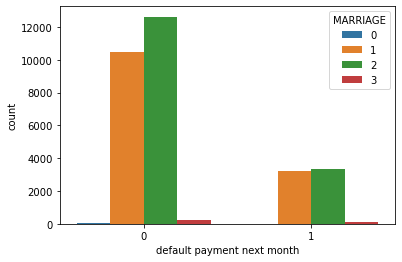

In [56]:
dados.shape

print("Média de pagamentos: ",dados["default payment next month"].mean()*100,"% \n")

print("Pessoas que pagaram vs.. pessoas inadimplentes:\n",dados["default payment next month"].value_counts())

sns.countplot(x = "default payment next month",
              hue = "MARRIAGE",
              dodge = 1,
              data = dados)



In [63]:
dados["AGE"]
dados['LIMIT_BALL']

KeyError: 'LIMIT_BALL'

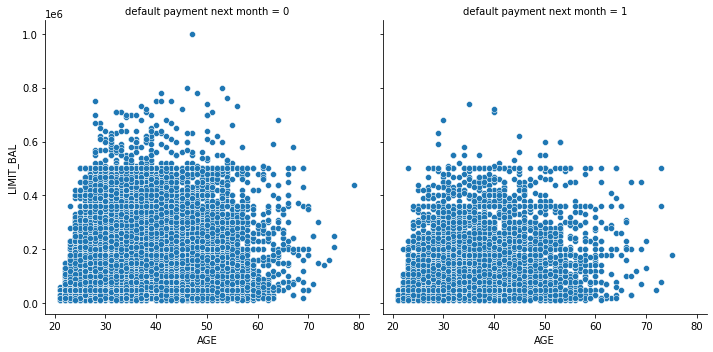

In [73]:
sns.relplot(data = dados, x = 'AGE', y = 'LIMIT_BAL', col = "default payment next month")